## Data Analysis

For this project I will be using dataset available for Kaggle competition 'Corporación Favorita Grocery Sales Forecasting'  - https://www.kaggle.com/c/favorita-grocery-sales-forecasting. </br>
The brief description of the competition is available in the overview page in the link shared above.
This is a comeptition about sales forecasting of thousands of items available in Corporación Favorita stores. It is brick-and-mortar located in Ecuador.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

For this analysis we will consider following data sets:
1. train.csv
2. stores.csv
3. items.csv
4. transactions.csv
5. oil.csv
<br/>

We will ignore other datasets since they are for specific kaggle competition submission and evaluation. Holiday_events file is also not used in this case to reduce our scope

In [2]:
# First step is to understand the data and the columns present in the data.

In [3]:
# Now let us read the data sets one by one and see the first five rows using the head command.
train = pd.read_csv("data/train.csv")
train.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


In [4]:
train.date = pd.to_datetime(train.date)
train

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN
5,5,2013-01-01,25,108786,3.0,NaN
6,6,2013-01-01,25,108797,1.0,NaN
7,7,2013-01-01,25,108952,1.0,NaN
8,8,2013-01-01,25,111397,13.0,NaN
9,9,2013-01-01,25,114790,3.0,NaN


In [5]:
#train = train.sample(frac = 0.3, replace = False)

In [6]:
len(train)

125497040

In [7]:
stores = pd.read_csv("data/stores.csv")
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [8]:
items = pd.read_csv("data/items.csv")
items.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [9]:
transactions = pd.read_csv("data/transactions.csv")
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [10]:
oil = pd.read_csv("data/oil.csv")
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [11]:
#holidays_events = pd.read_csv("data/holidays_events.csv")
#holidays_events.head()

## Data Analysis

In [12]:
#train.date = pd.to_datetime(train.date, format = "%Y-%m-%d")

In [13]:
# print("Minimum Date : ", min(train["date"]))

In [14]:
# print("Maximum Date : ", max(train.date))

In [15]:
# To find NA values in the data sets created, we can use a simple logic

In [16]:
train.isna().sum()

id                    0
date                  0
store_nbr             0
item_nbr              0
unit_sales            0
onpromotion    21657651
dtype: int64

As you can see from above the onpromotion column has missing values.
When you read the description of the dataset given in https://www.kaggle.com/c/favorita-grocery-sales-forecasting/data, you will find that 16 percent of the values in on promotion are missing values. We will deal with the missing values later when we analyze promotion data.

##### Missing Value imputation for train data.
Since promotion column has missing values, it is diffcult to impute the data as the values will be close to zero, since the data contains large number of non promo data

In [17]:
#train = train.dropna()

##### Negative values removal. 
I am more focussed about reducing oppourtunity cost. Hence I will remove negative items which are basically returns, and I won't be worried about it right now. For analysis of returns separate analysis can be carried out.

In [18]:
train = train.loc[train["unit_sales"]>=0]

In [19]:
#import numpy
# from sklearn.preprocessing import Imputer
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# values = train.values
# X = values[:,2:4]
# y = values[:,5]
# # fill missing values with mean column values
# imputer = Imputer()
# transformed_X = imputer.fit_transform(X)
# # evaluate an LDA model on the dataset using k-fold cross validation
# model = LinearDiscriminantAnalysis()
# kfold = KFold(n_splits=2, random_state=7)
# result = cross_val_score(model, transformed_X, y, cv=kfold, scoring='accuracy')
# print(result.mean())

In [20]:
stores.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [21]:
items.isnull().sum()

item_nbr      0
family        0
class         0
perishable    0
dtype: int64

In [22]:
#transactions.isnull().sum()

In [23]:
oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [24]:
# Missing value for oil price with mean imputation

In [25]:
mean_oil_price = np.mean(oil.dcoilwtico)
oil.fillna(mean_oil_price, inplace=True)
#mean_oil_price

In [26]:
#oil.head()

As you can see from above the we dont have daily oil prices from some of the data

In [27]:
#holidays_events.isnull().sum()

In [28]:
len(train)

125489245

Now we will join all the datasets in one frame, so that we can analyse the data better. I will be performing left join on train dataset

In [29]:
train = train.merge(stores, on = "store_nbr", how="left")
del stores

In [30]:
len(train)

125489245

In [31]:
train = train.merge(items, on = "item_nbr", how = "left")
del items

In [32]:
len(train)

125489245

In [33]:
oil["date"] = pd.to_datetime(oil["date"])
train = train.merge(oil, on = "date", how = "left")
del oil

In [34]:
len(train)

125489245

In [35]:
#train = train.merge(holidays_events, on="date", how = "left")
#del holidays_events

In [36]:
#len(train)

## We can ask the following questions from business perspective

1. What are the top 10 Stores with highest Sales?
2. What are the top 10 items with highest number of sales ?
3. What are the top 10 unit sales with respect to family (Category) ?
4. What is the overall sales trend ?
5. Whether oil prices affect sales ?
6. What are top stores which has large number of items per transaction ?
7. Did promotion affect the sales ?
8. How is the effect of promotion with repect to one product in one location ?

##### 1. What are the top 10 Stores with highest Sales?

In [37]:
store_agg = train.groupby(["store_nbr"])[["unit_sales"]].sum().reset_index()

In [38]:
store_agg = store_agg.sort_values('unit_sales', ascending=False)
store_agg.head()

,store_nbr,unit_sales
43,44,6.209188e+07
44,45,5.450092e+07
46,47,5.095044e+07
2,3,5.048553e+07
48,49,4.342521e+07


In [39]:
store_agg_top = store_agg.head(10)
store_agg_top.store_nbr = pd.Categorical(store_agg_top.store_nbr)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


[Text(0,0,'44'),
 Text(0,0,'45'),
 Text(0,0,'47'),
 Text(0,0,'3'),
 Text(0,0,'49'),
 Text(0,0,'46'),
 Text(0,0,'48'),
 Text(0,0,'51'),
 Text(0,0,'8'),
 Text(0,0,'50')]

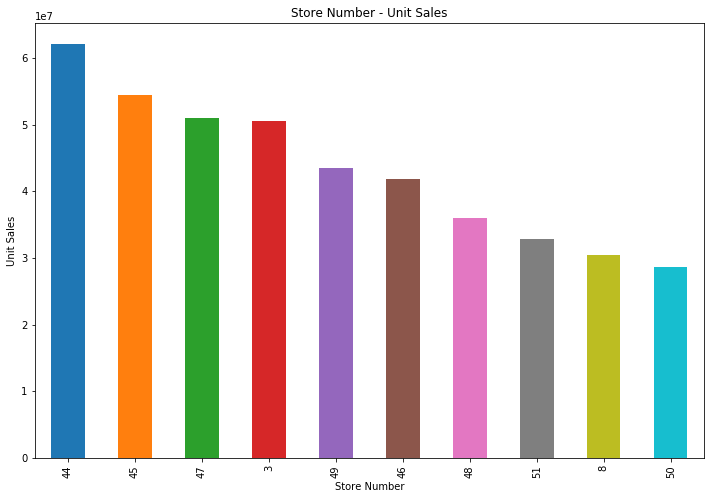

In [40]:
plt.figure(figsize=(12,8))
ax = store_agg_top['unit_sales'].plot(kind = 'bar')
ax.set_title('Store Number - Unit Sales')
ax.set_xlabel('Store Number')
ax.set_ylabel('Unit Sales')
ax.set_xticklabels(store_agg_top['store_nbr'])

In [41]:
#transactions_store = store_agg.merge(transactions, how = 'left', on='store_nbr')

In [42]:
#transactions_store.head()

In [43]:
del store_agg, store_agg_top

#### 2. What are the top 10 items with highest number of sales ?

In [44]:
item_agg = train.groupby(["item_nbr"])[["unit_sales"]].sum().reset_index()

In [45]:
item_agg.head()

,item_nbr,unit_sales
0,96995,10145.0
1,99197,17910.0
2,103501,164753.0
3,103520,201125.0
4,103665,219687.0


In [46]:
item_agg = item_agg.sort_values(by = ['unit_sales'], ascending=False)

In [47]:
item_agg_top = item_agg.head(10)
item_agg_top.item_nbr = pd.Categorical(item_agg_top.item_nbr)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


[Text(0,0,'1503844'),
 Text(0,0,'1047679'),
 Text(0,0,'1473474'),
 Text(0,0,'364606'),
 Text(0,0,'819932'),
 Text(0,0,'1463992'),
 Text(0,0,'807493'),
 Text(0,0,'265559'),
 Text(0,0,'502331'),
 Text(0,0,'314384')]

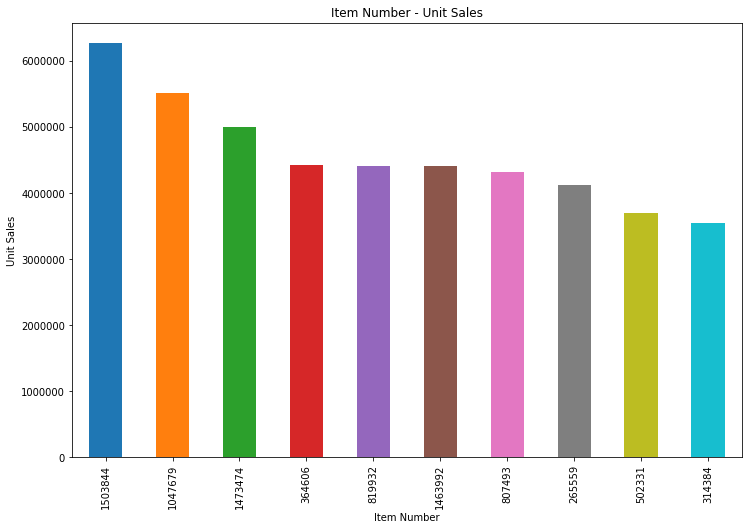

In [48]:
plt.figure(figsize=(12,8))
ax = item_agg_top['unit_sales'].plot(kind = 'bar')
ax.set_title('Item Number - Unit Sales')
ax.set_xlabel('Item Number')
ax.set_ylabel('Unit Sales')
ax.set_xticklabels(item_agg_top['item_nbr'])

In [49]:
del item_agg, item_agg_top

#### 3. What are the top 10 unit sales with respect to family (Category) ?

In [50]:
family_agg = train.groupby(["family"])[["unit_sales"]].sum().reset_index()

In [51]:
family_agg.head()

,family,unit_sales
0,AUTOMOTIVE,555120.0
1,BABY CARE,10051.0
2,BEAUTY,337918.0
3,BEVERAGES,216985028.0
4,BOOKS,6438.0


In [52]:
family_agg = family_agg.sort_values(by = ['unit_sales'], ascending=False)
family_agg_top = family_agg.head(10)
family_agg_top.family = pd.Categorical(family_agg_top.family)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


[Text(0,0,'GROCERY I'),
 Text(0,0,'BEVERAGES'),
 Text(0,0,'PRODUCE'),
 Text(0,0,'CLEANING'),
 Text(0,0,'DAIRY'),
 Text(0,0,'BREAD/BAKERY'),
 Text(0,0,'POULTRY'),
 Text(0,0,'MEATS'),
 Text(0,0,'PERSONAL CARE'),
 Text(0,0,'DELI')]

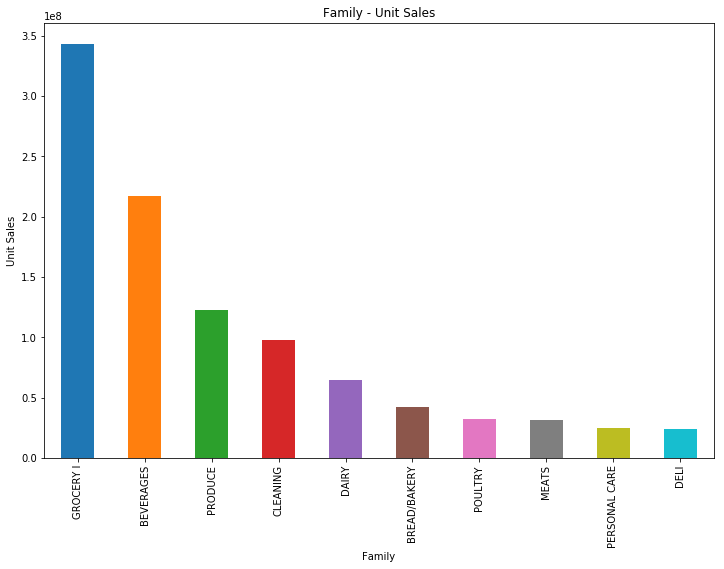

In [53]:
plt.figure(figsize=(12,8))
ax = family_agg_top['unit_sales'].plot(kind = 'bar')
ax.set_title('Family - Unit Sales')
ax.set_xlabel('Family')
ax.set_ylabel('Unit Sales')
ax.set_xticklabels(family_agg_top['family'])

In [56]:
del family_agg, family_agg_top

#### 4. What is the overall sales trend ?

In [48]:
#train["date"] = pd.to_datetime(train["date"], format= "%Y-%m-%d")
#dt = datetime.date(train["date"])
#train["date"].dt.week

In [57]:
train["Week"] = train["date"].dt.strftime('%Y-%U')

In [58]:
train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,type,cluster,family,class,perishable,dcoilwtico,Week
0,0,2013-01-01,25,103665,7.0,NaN,Salinas,Santa Elena,D,1,BREAD/BAKERY,2712,1,67.714366,2013-00
1,1,2013-01-01,25,105574,1.0,NaN,Salinas,Santa Elena,D,1,GROCERY I,1045,0,67.714366,2013-00
2,2,2013-01-01,25,105575,2.0,NaN,Salinas,Santa Elena,D,1,GROCERY I,1045,0,67.714366,2013-00
3,3,2013-01-01,25,108079,1.0,NaN,Salinas,Santa Elena,D,1,GROCERY I,1030,0,67.714366,2013-00
4,4,2013-01-01,25,108701,1.0,NaN,Salinas,Santa Elena,D,1,DELI,2644,1,67.714366,2013-00


In [59]:
Weekly_sales = train.loc[:,["Week", "unit_sales"]]

In [60]:
Weekly_Sales_Agg = Weekly_sales.groupby(['Week'])['unit_sales'].sum().reset_index()

In [62]:
Weekly_Sales_Agg.head()

,Week,unit_sales
0,2013-00,1691923.662
1,2013-01,2429002.689
2,2013-02,2371941.068
3,2013-03,2302903.251
4,2013-04,2420983.654


[Text(0,0,'01-2012'),
 Text(0,0,'01-2013'),
 Text(0,0,'01-2014'),
 Text(0,0,'01-2015'),
 Text(0,0,'01-2016'),
 Text(0,0,'01-2017'),
 Text(0,0,'50-2017')]

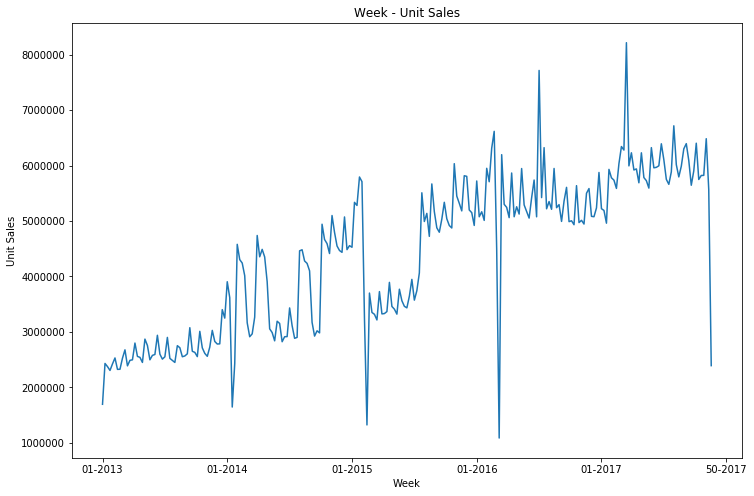

In [68]:
plt.figure(figsize=(12,8))
# plt.plot(Weekly_Sales_Agg['Week'], Weekly_Sales_Agg['unit_sales'])
# plt.xlabel('Week')
# plt.ylabel('Unit Sales')
# plt.title('Weekly Sales')
ax = Weekly_Sales_Agg['unit_sales'].plot()
ax.set_title('Week - Unit Sales')
ax.set_xlabel('Week')
ax.set_ylabel('Unit Sales')
ax.set_xticklabels(['01-2012', '01-2013','01-2014','01-2015','01-2016','01-2017','50-2017'])

In [59]:
#min(train['date'])

In [69]:
del Weekly_sales, Weekly_Sales_Agg

#### 5. Whether oil prices affect sales ?

In [70]:
oil_price_sales = train.loc[:,['Week', "unit_sales", "dcoilwtico"]]

In [71]:
oil_price_sales.head()

,Week,unit_sales,dcoilwtico
0,2013-00,7.0,67.714366
1,2013-00,1.0,67.714366
2,2013-00,2.0,67.714366
3,2013-00,1.0,67.714366
4,2013-00,1.0,67.714366


In [72]:
#oil_price_sales = oil_price_sales.dropna()

In [73]:
oil_price_sales_agg = oil_price_sales.groupby(['Week'])['unit_sales'].sum().reset_index()
oil_price_sales_agg_avg = oil_price_sales.groupby(['Week'])['dcoilwtico'].mean().reset_index()

In [74]:
#oil_price_sales_agg

[Text(0,0,'01-2012'),
 Text(0,0,'01-2013'),
 Text(0,0,'01-2014'),
 Text(0,0,'01-2015'),
 Text(0,0,'01-2016'),
 Text(0,0,'01-2017'),
 Text(0,0,'50-2017')]

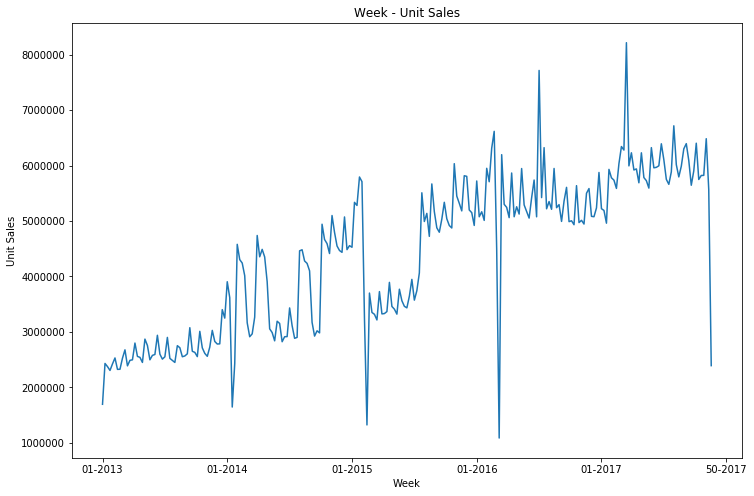

In [75]:
plt.figure(figsize=(12,8))
# plt.plot(oil_price_sales_agg['Week'], oil_price_sales_agg['unit_sales'])
# plt.xlabel("Week")
# plt.ylabel("Unit Sales")
# plt.title("Weekly Unit Sales")
ax = oil_price_sales_agg['unit_sales'].plot()
ax.set_title('Week - Unit Sales')
ax.set_xlabel('Week')
ax.set_ylabel('Unit Sales')
ax.set_xticklabels(ax.set_xticklabels(['01-2012', '01-2013','01-2014','01-2015','01-2016','01-2017','50-2017']))

[Text(0,0,'01-2012'),
 Text(0,0,'01-2013'),
 Text(0,0,'01-2014'),
 Text(0,0,'01-2015'),
 Text(0,0,'01-2016'),
 Text(0,0,'01-2017'),
 Text(0,0,'50-2017')]

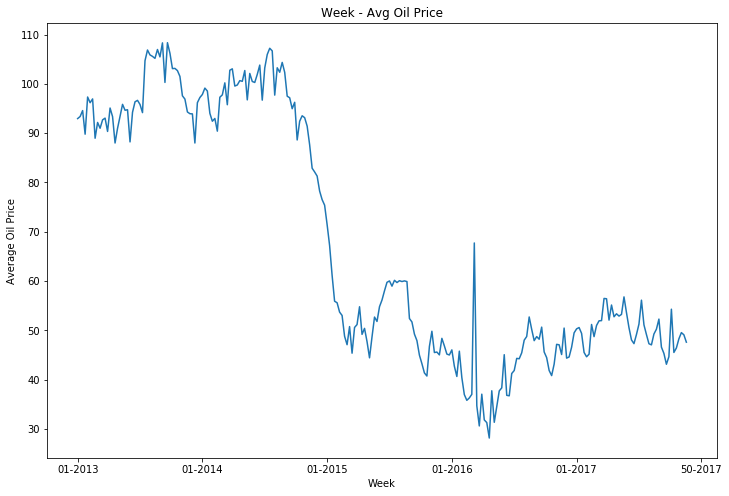

In [76]:
plt.figure(figsize=(12,8))
# plt.plot(oil_price_sales_agg['Week'], oil_price_sales_agg['unit_sales'])
# plt.xlabel("Week")
# plt.ylabel("Unit Sales")
# plt.title("Weekly Unit Sales")
ax = oil_price_sales_agg_avg['dcoilwtico'].plot()
ax.set_title('Week - Avg Oil Price')
ax.set_xlabel('Week')
ax.set_ylabel('Average Oil Price')
ax.set_xticklabels(ax.set_xticklabels(['01-2012', '01-2013','01-2014','01-2015','01-2016','01-2017','50-2017']))

In [77]:
del oil_price_sales, oil_price_sales_agg, oil_price_sales_agg_avg

#### 6. What are top stores which has large number of items per transaction ?

In [78]:
store_agg = train.groupby(["store_nbr"])[["unit_sales"]].sum().reset_index()

In [79]:
len(store_agg)

54

In [80]:
transactions['date'] = pd.to_datetime(transactions['date'])
transactions_agg = transactions.groupby(['store_nbr'])['transactions'].sum().reset_index()

In [81]:
store_agg_trans = store_agg.merge(transactions_agg, on=['store_nbr'], how = 'left')

In [82]:
len(store_agg_trans)

54

In [83]:
store_agg_trans.head()

,store_nbr,unit_sales,transactions
0,1,1.414660e+07,2553963
1,2,2.156755e+07,3219901
2,3,5.048553e+07,5366350
3,4,1.891105e+07,2519007
4,5,1.559287e+07,2347877


In [84]:
store_agg_trans["sale_per_transaction"] = store_agg_trans["unit_sales"] / store_agg_trans["transactions"]

In [85]:
store_agg_trans = store_agg_trans.sort_values('sale_per_transaction', ascending=False)
store_agg_trans_top = store_agg_trans.head(10)

[Text(0,0,'51'),
 Text(0,0,'42'),
 Text(0,0,'21'),
 Text(0,0,'29'),
 Text(0,0,'52'),
 Text(0,0,'53'),
 Text(0,0,'49'),
 Text(0,0,'3'),
 Text(0,0,'28'),
 Text(0,0,'20')]

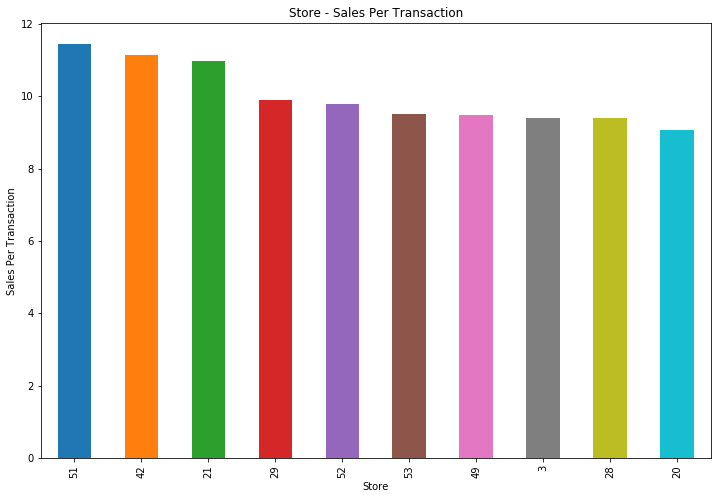

In [86]:
plt.figure(figsize=(12,8))
ax = store_agg_trans_top['sale_per_transaction'].plot(kind = 'bar')
ax.set_title('Store - Sales Per Transaction')
ax.set_xlabel('Store')
ax.set_ylabel('Sales Per Transaction')
ax.set_xticklabels(store_agg_trans_top['store_nbr'])

In [87]:
del store_agg, store_agg_trans, store_agg_trans_top

#### 7. Did promotion affect the sales ?

In [88]:
promo_nonpromo = train.loc[:,['date', 'unit_sales', 'store_nbr', 'item_nbr', 'onpromotion']]

In [89]:
promo_nonpromo = promo_nonpromo.dropna()

In [90]:
promo_nonpromo_agg = promo_nonpromo.groupby(['onpromotion'])['unit_sales'].sum().reset_index()
#promo_nonpromo['onpromotion'] = promo_nonpromo['onpromotion'].astype(str)
promo_nonpromo_size = promo_nonpromo.groupby(['onpromotion']).count().reset_index()

In [91]:
promo_nonpromo_agg = promo_nonpromo_agg.merge(promo_nonpromo_size.loc[:,["date","onpromotion"]], how = 'left', on = 'onpromotion')
promo_nonpromo_agg['sale_per_transaction'] = promo_nonpromo_agg['unit_sales'] / promo_nonpromo_agg['date']
promo_nonpromo_agg.head()

,onpromotion,unit_sales,date,sale_per_transaction
0,False,7.768201e+08,96022287,8.089998
1,True,1.051831e+08,7810614,13.466682


[Text(0,0,'False'), Text(0,0,'True')]

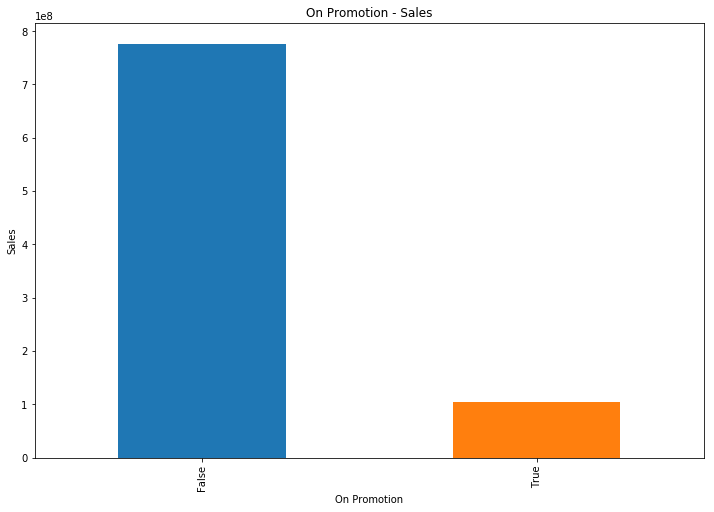

In [92]:
plt.figure(figsize=(12,8))
ax = promo_nonpromo_agg['unit_sales'].plot(kind = 'bar')
ax.set_title('On Promotion - Sales')
ax.set_xlabel('On Promotion')
ax.set_ylabel('Sales')
ax.set_xticklabels(promo_nonpromo_agg['onpromotion'])

[Text(0,0,'False'), Text(0,0,'True')]

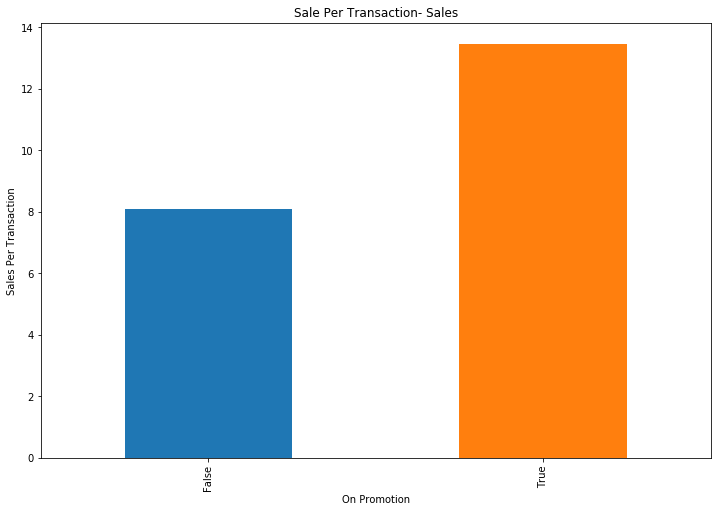

In [93]:
plt.figure(figsize=(12,8))
ax = promo_nonpromo_agg['sale_per_transaction'].plot(kind = 'bar')
ax.set_title('Sale Per Transaction- Sales')
ax.set_xlabel('On Promotion')
ax.set_ylabel('Sales Per Transaction')
ax.set_xticklabels(promo_nonpromo_agg['onpromotion'])

#### 8. How is the effect of promotion with repect to one product in one location ?

In [94]:
switch = train.loc[:,['item_nbr', 'date', 'onpromotion']]

In [95]:
switch_agg = switch.groupby(['item_nbr', 'onpromotion']).count().reset_index()

In [96]:
switch_agg.head()

,item_nbr,onpromotion,date
0,96995,False,1273
1,99197,False,4899
2,99197,True,1
3,103501,False,26028
4,103501,True,846


In [97]:
switch_agg_true = switch_agg.loc[switch_agg['onpromotion'] == True]

In [98]:
switch_agg_true = switch_agg_true.sort_values('date', ascending=False)

In [99]:
switch_agg_true.head()

,item_nbr,onpromotion,date
680,323013,True,13501
276,208384,True,12551
2232,849142,True,12421
706,346065,True,11820
1662,671076,True,11684


As you can see from above item number 323013 is the one which was under promotion for maximum number of time

In [100]:
item_323013 = train.loc[train['item_nbr'] == 323013]

In [101]:
#item_323013 = item_323013.dropna()

In [102]:
# filtering for location quito
item_323013_quito = item_323013.loc[item_323013['city'] == 'Quito']

In [103]:
item_323013_quito.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,type,cluster,family,class,perishable,dcoilwtico,Week
820,820,2013-01-02,1,323013,15.0,NaN,Quito,Pichincha,D,13,GROCERY I,1058,0,93.14,2013-00
1850,1850,2013-01-02,2,323013,16.0,NaN,Quito,Pichincha,D,13,GROCERY I,1058,0,93.14,2013-00
2976,2976,2013-01-02,3,323013,32.0,NaN,Quito,Pichincha,D,8,GROCERY I,1058,0,93.14,2013-00
4154,4154,2013-01-02,4,323013,6.0,NaN,Quito,Pichincha,D,9,GROCERY I,1058,0,93.14,2013-00
6243,6243,2013-01-02,6,323013,33.0,NaN,Quito,Pichincha,D,13,GROCERY I,1058,0,93.14,2013-00


In [104]:
item_323013_quito = item_323013_quito.loc[:,['date', 'unit_sales', 'onpromotion']]

In [105]:
item_323013_quito.head()

,date,unit_sales,onpromotion
820,2013-01-02,15.0,NaN
1850,2013-01-02,16.0,NaN
2976,2013-01-02,32.0,NaN
4154,2013-01-02,6.0,NaN
6243,2013-01-02,33.0,NaN


In [106]:
item_323013_quito['Week'] = item_323013_quito['date'].dt.strftime('%Y-%U')

In [107]:
item_323013_quito_agg = item_323013_quito.groupby(['onpromotion', 'Week'])['unit_sales'].sum().reset_index()

In [108]:
item_323013_quito_agg

,onpromotion,Week,unit_sales
0,False,2014-13,3034.0
1,False,2014-14,3445.0
2,False,2014-15,4011.0
3,False,2014-16,1809.0
4,False,2014-17,2959.0
5,False,2014-18,2574.0
6,False,2014-19,1681.0
7,False,2014-20,1702.0
8,False,2014-21,1394.0
9,False,2014-22,1836.0


In [109]:
item_323013_quito_agg_plot = item_323013_quito.groupby(['Week'])['unit_sales'].sum().reset_index()

[Text(0,0,'50-2013'),
 Text(0,0,'01-2014'),
 Text(0,0,'50-2014'),
 Text(0,0,'01-2015'),
 Text(0,0,'50-2015'),
 Text(0,0,'01-2016'),
 Text(0,0,'01-2017')]

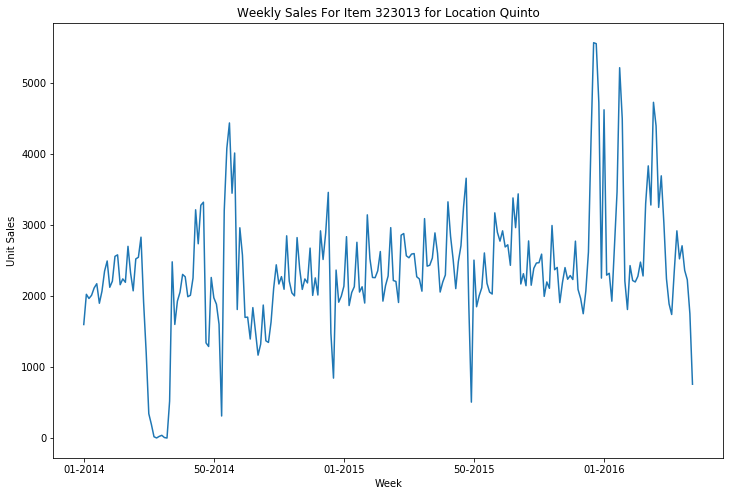

In [117]:
plt.figure(figsize=(12,8))
ax = item_323013_quito_agg_plot['unit_sales'].plot()
ax.set_title('Weekly Sales For Item 323013 for Location Quinto')
ax.set_xlabel('Week')
ax.set_ylabel('Unit Sales')
# plt.plot(item_323013_quito_agg_plot['Week'], item_323013_quito_agg_plot['unit_sales'])
# plt.xlabel('Week')
# plt.ylabel('Unit Sales')
# plt.title("Weekly Sales For Item 323013 for Location Quinto")
ax.set_xticklabels(ax.set_xticklabels(['50-2013', '01-2014','50-2014','01-2015', '50-2015', '01-2016','01-2017','50-2017']))
#plt.plot(item_323013_quito_agg['Week'], item_323013_quito_agg['unit_sales'])

In [111]:
# Weeks when item was in promotion for quinto region
item_323013_quito_agg_true = item_323013_quito_agg.loc[item_323013_quito_agg['onpromotion']== True]
item_323013_quito_agg_false = item_323013_quito_agg.loc[item_323013_quito_agg['onpromotion']== False]

In [112]:
len(item_323013_quito_agg_false.Week)

168

In [113]:
week_not_in_promotion = item_323013_quito_agg_false[~(item_323013_quito_agg_false['Week'].isin(item_323013_quito_agg_true['Week']))]

In [114]:
week_not_in_promotion

,onpromotion,Week,unit_sales
0,False,2014-13,3034.0
1,False,2014-14,3445.0
2,False,2014-15,4011.0
3,False,2014-16,1809.0
4,False,2014-17,2959.0
5,False,2014-18,2574.0
7,False,2014-20,1702.0
8,False,2014-21,1394.0
9,False,2014-22,1836.0
11,False,2014-24,1167.0


[Text(0,0,'50-2013'),
 Text(0,0,'01-2014'),
 Text(0,0,'50-2014'),
 Text(0,0,'01-2015'),
 Text(0,0,'50-2015'),
 Text(0,0,'01-2016'),
 Text(0,0,'01-2017'),
 Text(0,0,'50-2017')]

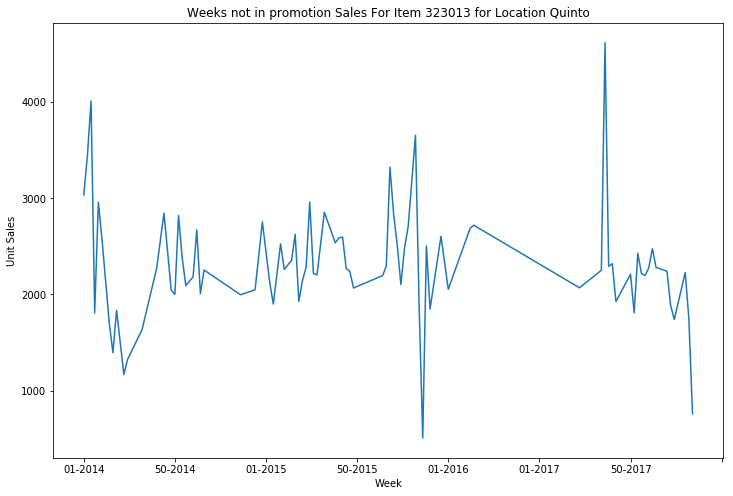

In [119]:
plt.figure(figsize=(12,8))
ax = week_not_in_promotion['unit_sales'].plot()
ax.set_title('Weeks not in promotion Sales For Item 323013 for Location Quinto')
ax.set_xlabel('Week')
ax.set_ylabel('Unit Sales')
# plt.plot(item_323013_quito_agg_plot['Week'], item_323013_quito_agg_plot['unit_sales'])
# plt.xlabel('Week')
# plt.ylabel('Unit Sales')
# plt.title("Weekly Sales For Item 323013 for Location Quinto")
ax.set_xticklabels(ax.set_xticklabels(['50-2013', '01-2014','50-2014','01-2015', '50-2015', '01-2016','01-2017','50-2017']))
#plt.plot(item_323013_quito_agg['Week'], item_323013_quito_agg['unit_sales'])

In [120]:
week_in_promotion = item_323013_quito_agg_false[(item_323013_quito_agg_false['Week'].isin(item_323013_quito_agg_true['Week']))]

[Text(0,0,'50-2013'),
 Text(0,0,'01-2014'),
 Text(0,0,'50-2014'),
 Text(0,0,'01-2015'),
 Text(0,0,'50-2015'),
 Text(0,0,'01-2016'),
 Text(0,0,'01-2017'),
 Text(0,0,'50-2017')]

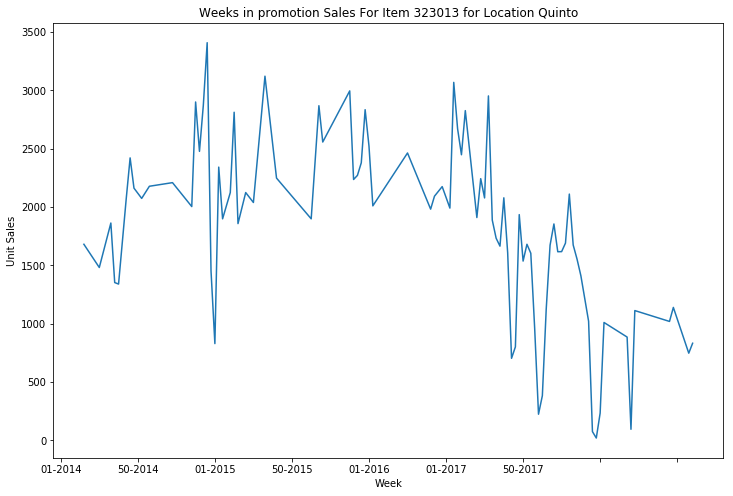

In [121]:
plt.figure(figsize=(12,8))
ax = week_in_promotion['unit_sales'].plot()
ax.set_title('Weeks in promotion Sales For Item 323013 for Location Quinto')
ax.set_xlabel('Week')
ax.set_ylabel('Unit Sales')
# plt.plot(item_323013_quito_agg_plot['Week'], item_323013_quito_agg_plot['unit_sales'])
# plt.xlabel('Week')
# plt.ylabel('Unit Sales')
# plt.title("Weekly Sales For Item 323013 for Location Quinto")
ax.set_xticklabels(ax.set_xticklabels(['50-2013', '01-2014','50-2014','01-2015', '50-2015', '01-2016','01-2017','50-2017']))
#plt.plot(item_323013_quito_agg['Week'], item_323013_quito_agg['unit_sales'])